In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


In [2]:
res = pd.read_csv('../data/results/omni.tsv', sep="\t")
res

,cell type,tools,GRN (EPR),GRN (enrich %),GRN (celltype),GRN (AUC),TF enrichment,TF-gene only
0,endothelial cell,scPRINT-large,2.30,14.20,0.0,0.001000,0.0,0
1,endothelial cell,scPRINT-large (classifier),4.69,12.50,0.0,0.002680,0.0,0
2,endothelial cell,scPRINT-medium,2.97,4.46,0.0,0.001000,1.0,0
3,endothelial cell,scPRINT-medium (classifier),2.46,62.50,1.0,0.002700,1.0,0
4,endothelial cell,scPRINT-medium (classifier),14.70,50.00,1.0,0.013590,NaN,1
...,...,...,...,...,...,...,...,...
97,kidney distal convoluted tubule epithelial cel...,scPRINT-medium (classifier),11.57,22.00,0.0,0.004300,NaN,1
98,kidney distal convoluted tubule epithelial cel...,GENIE3,6.73,3.40,1.0,0.004610,NaN,1
99,kidney distal convoluted tubule epithelial cel...,GENIE3,1.61,0.00,1.0,0.001115,0.0,0
100,kidney distal convoluted tubule epithelial cel...,scGPT,0.56,38.00,0.0,0.001000,1.0,0


In [13]:
plt.rcParams.update({'font.size': 14})


In [10]:
res['TF-gene only'] = res['TF-gene only'].replace({1: 'TF-gene only', 0: "All"})
res = res.rename(columns={'TF-gene only': 'Format'})

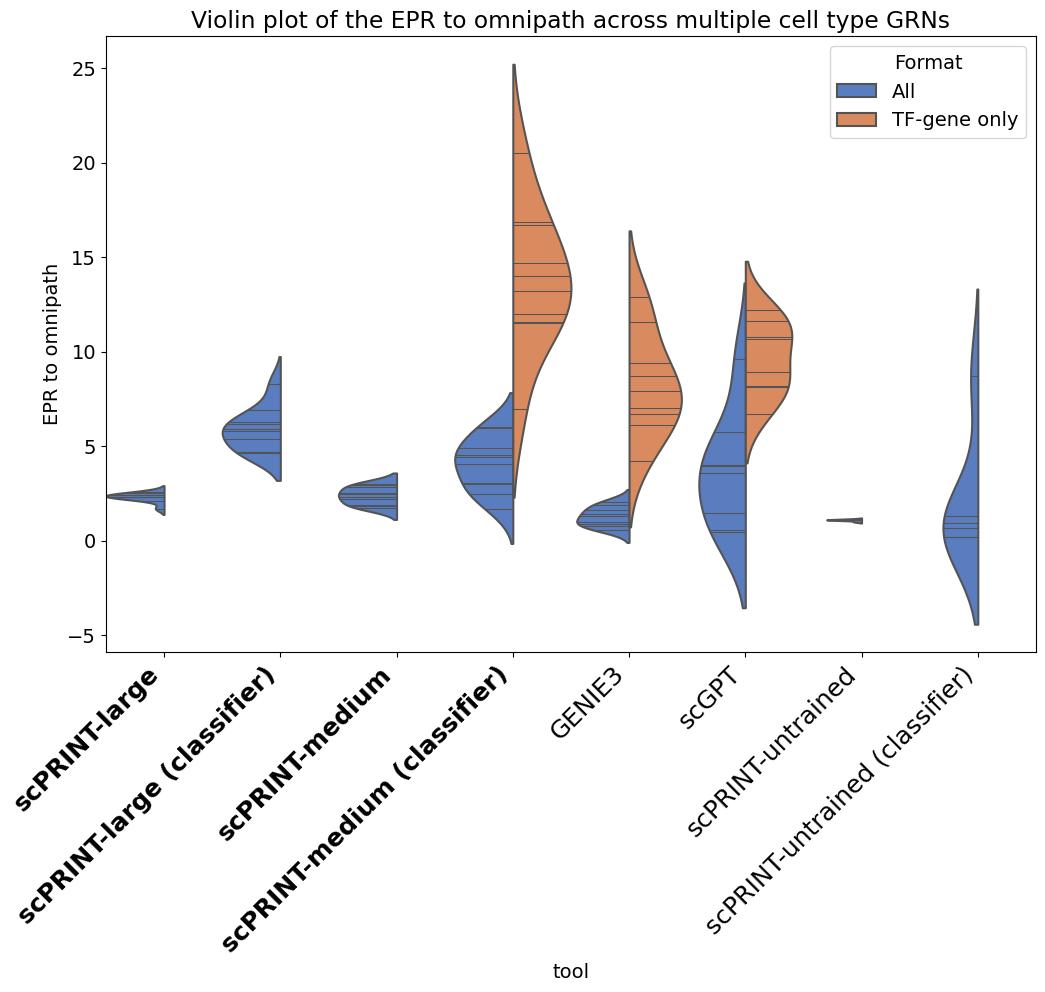

In [14]:
# Set the aesthetic style of the plots

# Create the violin plot with adjusted scale to fix the tiny side issue
plt.figure(figsize=(12, 8))
violin_plot = sns.violinplot(x='tools', y='GRN (EPR)', hue="Format", data=res, split=True, density_norm='count', width=1, linewidth=1.5, palette="muted", inner='stick')

# Set the title and labels of the plot
violin_plot.set_title('Violin plot of the EPR to omnipath across multiple cell type GRNs')
violin_plot.set_xlabel('tool')
violin_plot.set_ylabel('EPR to omnipath')

# Rotate the x labels for better readability and align them
xticks_labels = plt.gca().get_xticklabels()
for i, label in enumerate(xticks_labels):
    if i < 4:
        label.set_fontweight('bold')
plt.xticks(ticks=plt.gca().get_xticks(), labels=xticks_labels, rotation=45, ha="right", fontsize=18)

# Show the plot
plt.show()


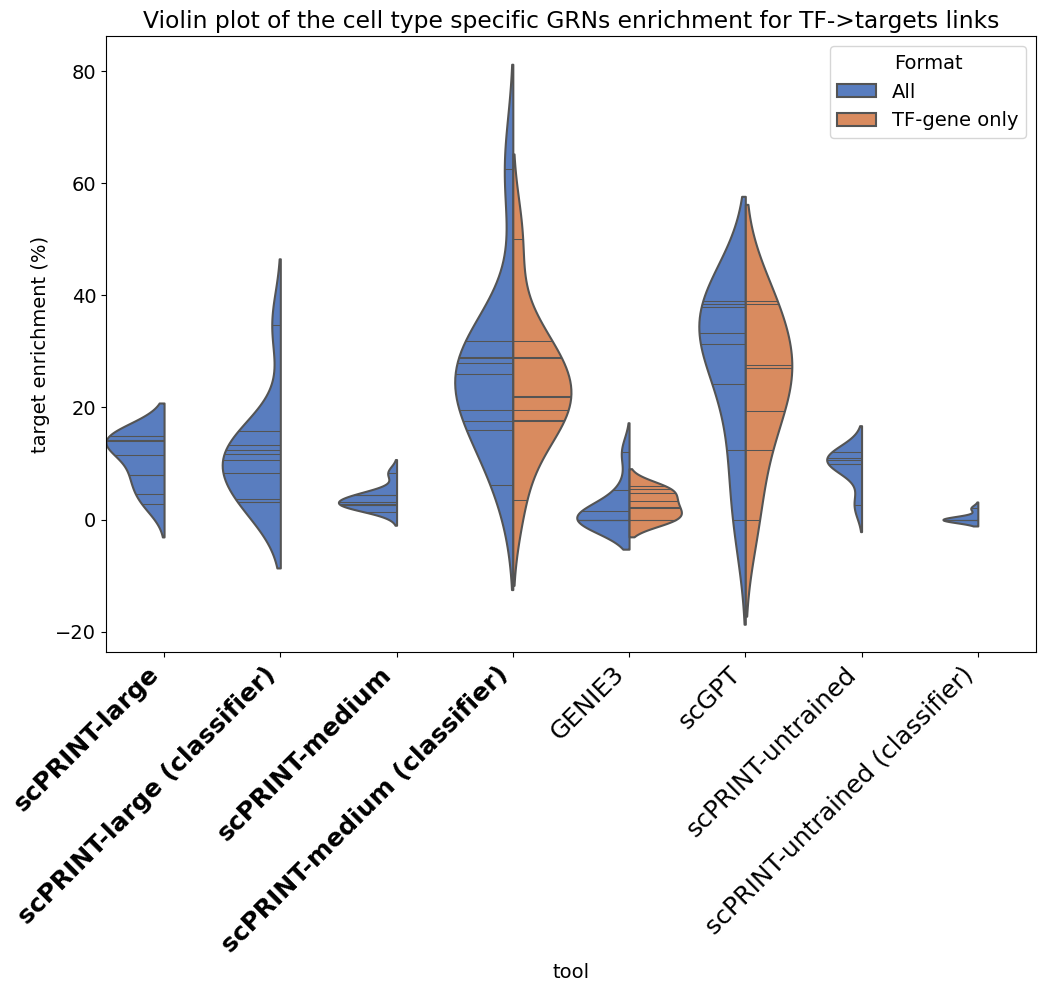

In [16]:
# Create the violin plot
plt.figure(figsize=(12, 8))

violin_plot = sns.violinplot(x='tools', y='GRN (enrich %)', hue="Format", data=res, split=True, density_norm='count', width=1, linewidth=1.5, palette="muted", inner='stick')

# Set the title and labels of the plot
violin_plot.set_title('Violin plot of the cell type specific GRNs enrichment for TF->targets links')
violin_plot.set_xlabel('tool')
violin_plot.set_ylabel('target enrichment (%)')

# Rotate the x labels for better readability
xticks_labels = plt.gca().get_xticklabels()
for i, label in enumerate(xticks_labels):
    if i < 4:
        label.set_fontweight('bold')
plt.xticks(ticks=plt.gca().get_xticks(), labels=xticks_labels, rotation=45, ha="right", fontsize=18)
# Show the plot
plt.show()

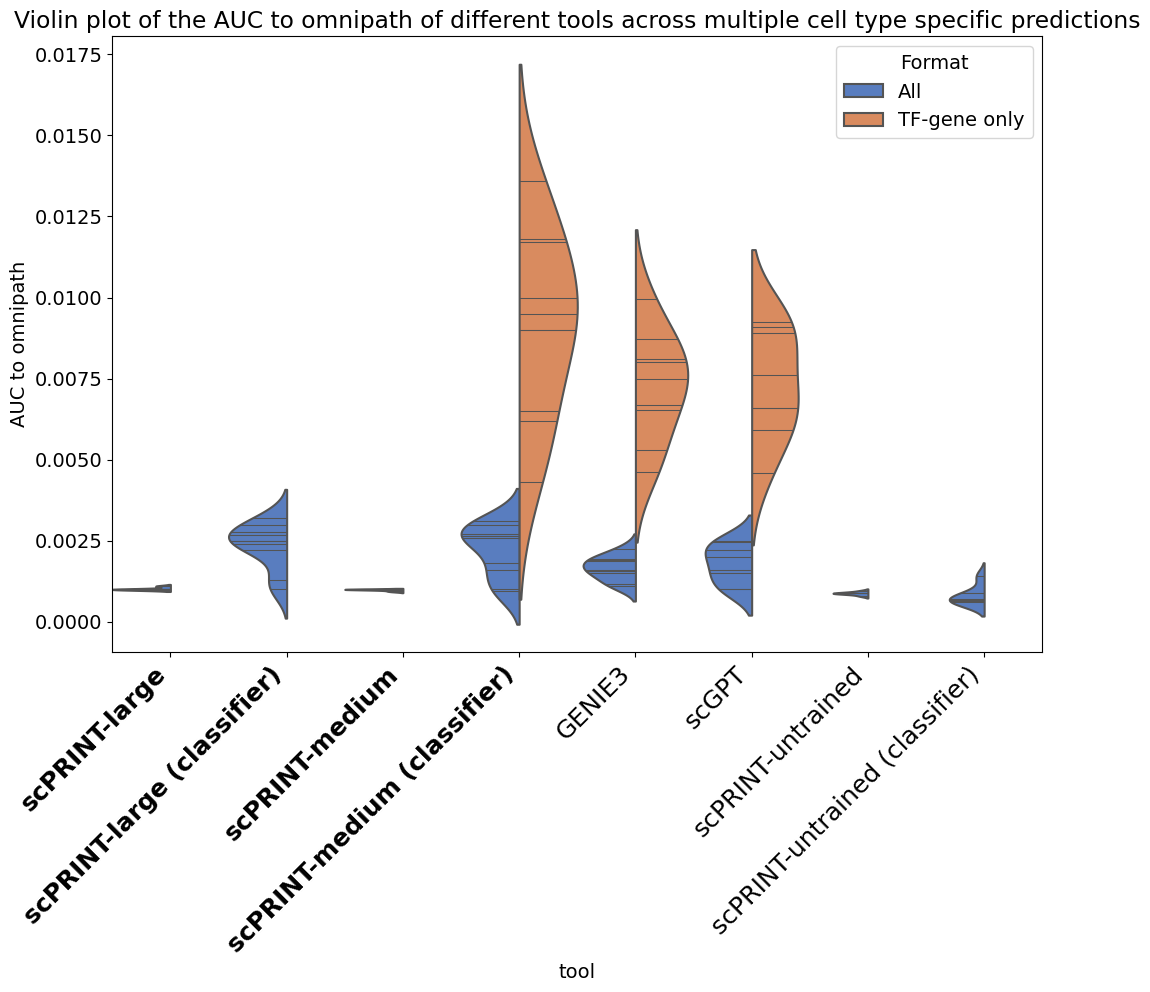

In [15]:
# Create the violin plot
plt.figure(figsize=(12, 8))
violin_plot = sns.violinplot(x='tools', y='GRN (AUC)', hue="Format", data=res, split=True, density_norm='count', width=1, linewidth=1.5, palette="muted", inner='stick')

# Set the title and labels of the plot
violin_plot.set_title('Violin plot of the AUC to omnipath of different tools across multiple cell type specific predictions')
violin_plot.set_xlabel('tool')
violin_plot.set_ylabel('AUC to omnipath')

# Rotate the x labels for better readability and increase their size
# Make the first four x labels bold
xticks_labels = plt.gca().get_xticklabels()
for i, label in enumerate(xticks_labels):
    if i < 4:
        label.set_fontweight('bold')
plt.xticks(ticks=plt.gca().get_xticks(), labels=xticks_labels, rotation=45, ha="right", fontsize=18)

# Show the plot
plt.show()

In [16]:
res = pd.read_csv('../../data/results/sroy.tsv', sep="\t")
res

,metric,tool,liu (33; 10k),liu-chip (90; 435k),liu-ko (157; 108k),chen (19; 3k),duren (44; 7k),semrau (38; 4k),semrau (chip),semrau (ko)
0,AUC,GENIE3,0.0375,0.320,0.0540,0.0190,0.00690,0.0120,0.2300,0.0270
1,AUC,GENIE3-TF,0.0464,0.290,0.0920,0.0200,0.00780,0.0150,0.2680,0.0340
2,AUC,scPRINT-medium,0.0315,0.250,0.0546,0.0178,0.05700,0.0123,0.2310,0.0300
3,AUC,scPRINT-medium + omni-class,0.0375,0.299,0.0670,0.0257,0.00685,0.0235,0.2267,0.0300
4,AUC,scPRINT-medium + self-class,0.0565,0.297,0.0836,0.1080,0.00670,0.0098,0.2770,0.0466
5,AUC,scGPT,0.0450,0.312,0.0566,0.0200,NaN,NaN,NaN,NaN
6,EPR,GENIE3,2.1880,1.400,1.1200,1.3800,1.85000,1.2580,0.9800,0.7400
7,EPR,GENIE3-TF,2.1600,1.190,2.1700,0.7370,2.81000,1.5580,1.3960,1.2650
8,EPR,scPRINT-medium,1.0220,1.040,0.9220,1.1200,1.00000,1.0600,0.9500,1.1200
9,EPR,scPRINT-medium + omni-class,1.7160,1.224,1.3300,1.7800,1.85000,0.3790,1.1490,0.9500


In [19]:
# Melt the dataframe to transform it from wide to long format
res_melted = res.melt(id_vars=['metric', 'tool'], var_name='annotation', value_name='value')
# Pivot the dataframe to have metrics as columns
res_pivoted = res_melted.pivot_table(index=['tool', 'annotation'], columns='metric', values='value', aggfunc='first')


metric                                               AUC    EPR
tool                        annotation                         
GENIE3                      chen (19; 3k)        0.01900  1.380
                            duren (44; 7k)       0.00690  1.850
                            liu (33; 10k)        0.03750  2.188
                            liu-chip (90; 435k)  0.32000  1.400
                            liu-ko (157; 108k)   0.05400  1.120
                            semrau (38; 4k)      0.01200  1.258
                            semrau (chip)        0.23000  0.980
                            semrau (ko)          0.02700  0.740
GENIE3-TF                   chen (19; 3k)        0.02000  0.737
                            duren (44; 7k)       0.00780  2.810
                            liu (33; 10k)        0.04640  2.160
                            liu-chip (90; 435k)  0.29000  1.190
                            liu-ko (157; 108k)   0.09200  2.170
                            semrau (38; 4k)      0.01500  1.558
                            semrau (chip)        0.26800  1.396
                            semrau (ko)          0.03400  1.265
scGPT                       chen (19; 3k)        0.02000  1.715
                            liu (33; 10k)        0.04500  2.370
                            liu-chip (90; 435k)  0.31200  1.296
                            liu-ko (157; 108k)   0.05660  1.166
scPRINT-medium              chen (19; 3k)        0.01780  1.120
                            duren (44; 7k)       0.05700  1.000
                            liu (33; 10k)        0.03150  1.022
                            liu-chip (90; 435k)  0.25000  1.040
                            liu-ko (157; 108k)   0.05460  0.922
                            semrau (38; 4k)      0.01230  1.060
                            semrau (chip)        0.23100  0.950
                            semrau (ko)          0.03000  1.120
scPRINT-medium + omni-class chen (19; 3k)        0.02570  1.780
                            duren (44; 7k)       0.00685  1.850
                            liu (33; 10k)        0.03750  1.716
                            liu-chip (90; 435k)  0.29900  1.224
                            liu-ko (157; 108k)   0.06700  1.330
                            semrau (38; 4k)      0.02350  0.379
                            semrau (chip)        0.22670  1.149
                            semrau (ko)          0.03000  0.950
scPRINT-medium + self-class chen (19; 3k)        0.10800  1.316
                            duren (44; 7k)       0.00670  1.850
                            liu (33; 10k)        0.05650  1.520
                            liu-chip (90; 435k)  0.29700  1.610
                            liu-ko (157; 108k)   0.08360  1.610
                            semrau (38; 4k)      0.00980  2.480
                            semrau (chip)        0.27700  0.919
                            semrau (ko)          0.04660  1.190

/home/ml4ig1/miniconda3/envs/scprint/lib/python3.10/site-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/home/ml4ig1/miniconda3/envs/scprint/lib/python3.10/site-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/home/ml4ig1/miniconda3/envs/scprint/lib/python3.10/site-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/hom

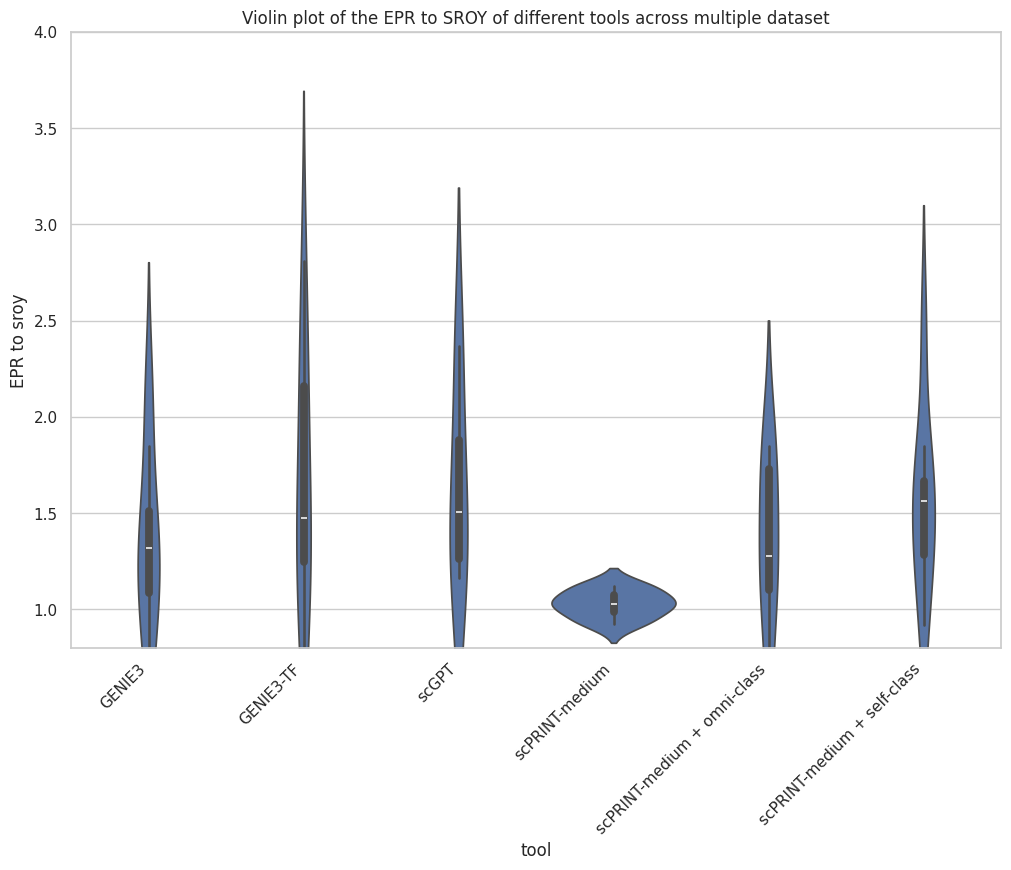

In [22]:
import seaborn as sns
import matplotlib.pyplot as plt

# Set the aesthetic style of the plots
sns.set(style="whitegrid")

# Create the violin plot with a focus on the 0.8 - 4 range for the y-axis
plt.figure(figsize=(12, 8))
violin_plot = sns.violinplot(x='tool', y='EPR', data=res_pivoted)
violin_plot.set_ylim(0.8, 4)  # Setting the y-axis limits to focus on the 0.8 - 4 range

# Set the title and labels of the plot
violin_plot.set_title('Violin plot of the EPR to SROY of different tools across multiple dataset')
violin_plot.set_xlabel('tool')
violin_plot.set_ylabel('EPR to sroy')

# Rotate the x labels for better readability and align them
plt.xticks(rotation=45, ha='right')

# Show the plot
plt.show()


In [26]:
mat = pd.read_csv('../data/results/other.tsv', sep="\t")
mat

,dataset,metrics,scGPT,GENIE3,scPRINT,scPRINT-class,GENIE3-TF
0,GWPS,TF_enr,1.0,1,1,1.0,NaN
1,GWPS,TF_target_enr,7.8,11,11,22.6,11.0
2,GWPS,celltype_pred,0.0,0,0,1.0,0.0
3,SROY LIU,TF_enr,1.0,1,1,1.0,NaN
4,SROY LIU,TF_target_enr,4.5,0,2,25.0,2.0
5,SROY LIU,celltype_pred,1.0,1,1,1.0,1.0


In [29]:
# Reshape the dataframe 'mat' to have the last four columns as one column with labels as rows
mat_melted = mat.melt(id_vars=mat.columns[:2], value_vars=mat.columns[2:], var_name='tools', value_name='value')
# Display the reshaped dataframe
mat_melted


,dataset,metrics,tools,value
0,GWPS,TF_enr,scGPT,1.0
1,GWPS,TF_target_enr,scGPT,7.8
2,GWPS,celltype_pred,scGPT,0.0
3,SROY LIU,TF_enr,scGPT,1.0
4,SROY LIU,TF_target_enr,scGPT,4.5
5,SROY LIU,celltype_pred,scGPT,1.0
6,GWPS,TF_enr,GENIE3,1.0
7,GWPS,TF_target_enr,GENIE3,11.0
8,GWPS,celltype_pred,GENIE3,0.0
9,SROY LIU,TF_enr,GENIE3,1.0


In [24]:
percentage_increase = res_pivoted / res_pivoted.xs('GENIE3', level='tool') - 1
percentage_increase


metric                                                AUC       EPR
tool                        annotation                             
GENIE3                      chen (19; 3k)        0.000000  0.000000
                            duren (44; 7k)       0.000000  0.000000
                            liu (33; 10k)        0.000000  0.000000
                            liu-chip (90; 435k)  0.000000  0.000000
                            liu-ko (157; 108k)   0.000000  0.000000
                            semrau (38; 4k)      0.000000  0.000000
                            semrau (chip)        0.000000  0.000000
                            semrau (ko)          0.000000  0.000000
GENIE3-TF                   chen (19; 3k)        0.052632 -0.465942
                            duren (44; 7k)       0.130435  0.518919
                            liu (33; 10k)        0.237333 -0.012797
                            liu-chip (90; 435k) -0.093750 -0.150000
                            liu-ko (157; 108k)   0.703704  0.937500
                            semrau (38; 4k)      0.250000  0.238474
                            semrau (chip)        0.165217  0.424490
                            semrau (ko)          0.259259  0.709459
scGPT                       chen (19; 3k)        0.052632  0.242754
                            liu (33; 10k)        0.200000  0.083181
                            liu-chip (90; 435k) -0.025000 -0.074286
                            liu-ko (157; 108k)   0.048148  0.041071
scPRINT-medium              chen (19; 3k)       -0.063158 -0.188406
                            duren (44; 7k)       7.260870 -0.459459
                            liu (33; 10k)       -0.160000 -0.532907
                            liu-chip (90; 435k) -0.218750 -0.257143
                            liu-ko (157; 108k)   0.011111 -0.176786
                            semrau (38; 4k)      0.025000 -0.157393
                            semrau (chip)        0.004348 -0.030612
                            semrau (ko)          0.111111  0.513514
scPRINT-medium + omni-class chen (19; 3k)        0.352632  0.289855
                            duren (44; 7k)      -0.007246  0.000000
                            liu (33; 10k)        0.000000 -0.215722
                            liu-chip (90; 435k) -0.065625 -0.125714
                            liu-ko (157; 108k)   0.240741  0.187500
                            semrau (38; 4k)      0.958333 -0.698728
                            semrau (chip)       -0.014348  0.172449
                            semrau (ko)          0.111111  0.283784
scPRINT-medium + self-class chen (19; 3k)        4.684211 -0.046377
                            duren (44; 7k)      -0.028986  0.000000
                            liu (33; 10k)        0.506667 -0.305302
                            liu-chip (90; 435k) -0.071875  0.150000
                            liu-ko (157; 108k)   0.548148  0.437500
                            semrau (38; 4k)     -0.183333  0.971383
                            semrau (chip)        0.204348 -0.062245
                            semrau (ko)          0.725926  0.608108

/home/ml4ig1/miniconda3/envs/scprint/lib/python3.10/site-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/home/ml4ig1/miniconda3/envs/scprint/lib/python3.10/site-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/home/ml4ig1/miniconda3/envs/scprint/lib/python3.10/site-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/hom

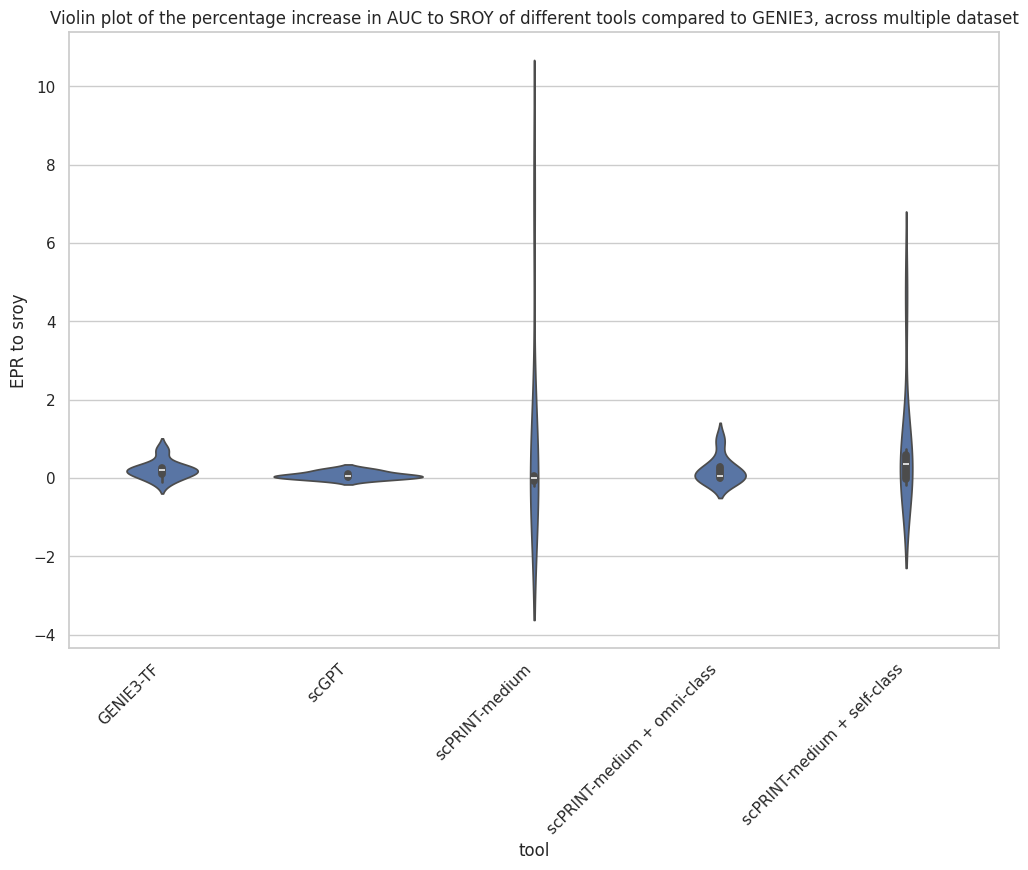

In [33]:
import seaborn as sns
import matplotlib.pyplot as plt

# Set the aesthetic style of the plots
sns.set(style="whitegrid")

# Create the violin plot with a focus on the 0.8 - 4 range for the y-axis
plt.figure(figsize=(12, 8))
violin_plot = sns.violinplot(x='tool', y='AUC', data=percentage_increase.iloc[8:])
#violin_plot.set_ylim(0.8, 4)  # Setting the y-axis limits to focus on the 0.8 - 4 range

# Set the title and labels of the plot
violin_plot.set_title('Violin plot of the percentage increase in AUC to SROY of different tools compared to GENIE3, across multiple dataset')
violin_plot.set_xlabel('tool')
violin_plot.set_ylabel('EPR to sroy')

# Rotate the x labels for better readability and align them
plt.xticks(rotation=45, ha='right')

# Show the plot
plt.show()